# Introduction to Linear Regression

### example

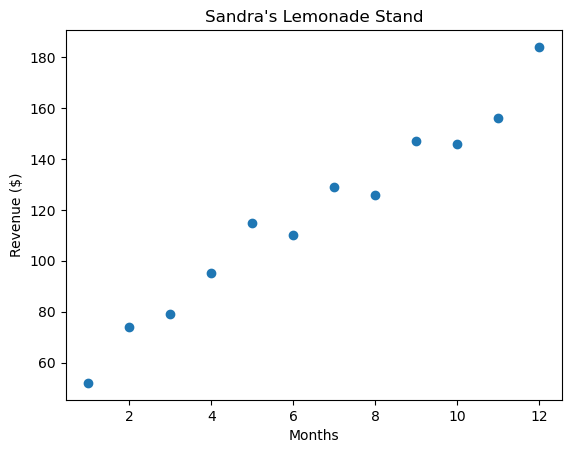

In [1]:
import matplotlib.pyplot as plt

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()

# What do you think the revenue in month 13 would be?(seeing the graph we predict that the revenue in month 13 will be 200)
month_13= 200

## Points and Lines

#### here example where we plot the data-the y values found as line by random taking of m and b and adjusting and seeing 

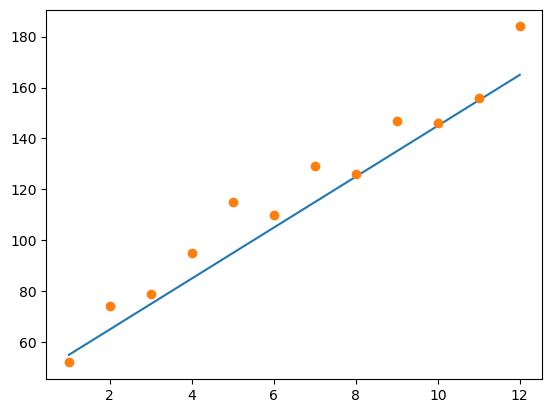

In [4]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 10
#intercept:
b = 45
y=[i*m+b for i in months]
plt.plot(months,y)
plt.plot(months, revenue, "o")

plt.show()
#here we can see how we did y values to get actual straight line to actual data

## Loss

### ex on loss calculation

In [5]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0
y_predicted1=[i*m1+b1 for i in x]

#y = 0.5x + 1
m2 = 0.5
b2 = 1
y_predicted2=[i*m2+b2 for i in x]

total_loss1 = 0

for i in range(len(y)):
  total_loss1 += (y[i] - y_predicted1[i]) ** 2

total_loss2=0

for i in range(len(y)):
  total_loss2 += (y[i] - y_predicted2[i]) ** 2

print(total_loss1)
print(total_loss2)
better_fit=2 #m2 and b2 are better

17
13.5


## Minimizing Loss

## Gradient Descent of intercept

In [8]:
#function for gradient descent
def get_gradient_at_b(x, y, m, b):
  diff = 0
  # N is the number of points
  N = len(x)
  for i in range(0, len(x)):
    y_val = y[i]
    x_val = x[i]
    diff += (y_val - ((m * x_val) + b))
  # Define b_gradient
  b_gradient = -2/N * diff
  return b_gradient

## gradient descent of slope

In [9]:
def get_gradient_at_m(x, y, m, b):
    diff = 0
    N = len(x)
    for i in range(N):
      y_val = y[i]
      x_val = x[i]
      diff += x_val*(y_val - ((m * x_val) + b))
    m_gradient = -2/N * diff
    return m_gradient

## Putting it together along with Learning Rate

In [11]:
#building the step function gradient descent and getting the next b and m we need
def get_gradient_at_b(x, y, b, m):#for gradient b
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):#for gradient m
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

# Define your step_gradient function here
def step_gradient(x,y,b_current,m_current):
  b_gradient=get_gradient_at_b(x,y,b_current,m_current)
  m_gradient=get_gradient_at_m(x,y,b_current,m_current)
  b=b_current - (0.01 * b_gradient)# we are taking 0.01 as learning rate
  m=m_current - (0.01 * m_gradient)
  return b,m


months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

b,m=step_gradient(months,revenue,b,m)
# Call your function here to update b and m
print(b, m)
#so this is one time where i get b and m but we do this bunch of times till where we get b and m minimum 

2.355 17.78333333333333


## Convergence

In [ ]:
import matplotlib.pyplot as plt#just for learning
from data import bs, bs_000000001, bs_01

iterations = range(1400)

plt.plot(iterations, bs)
plt.xlabel("Iterations")
plt.ylabel("b value")
plt.show()
#seeing num_iterations and b just guess
num_iterations=800
convergence_b=47

## Learning Rate

## Complete Step

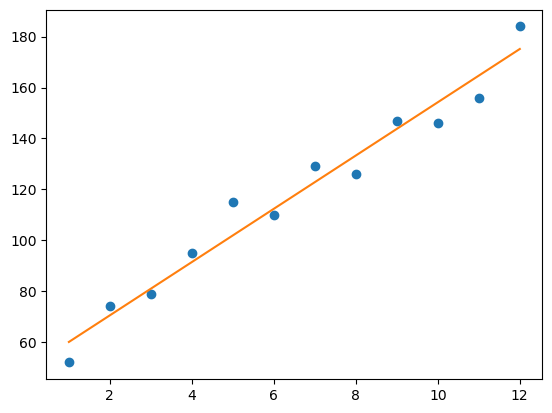

In [15]:
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y,learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
#Your gradient_descent function here:  

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

def gradient_descent(x,y,learning_rate,num_iterations):
  b=0
  m=0
  for i in range(num_iterations):
    b,m=step_gradient(b,m,x,y,learning_rate)
  return b,m

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()
#so what we are doing is that we are taking num_iterations and learning rate and that many iterations we call function that calcultes gradient of b and m then returns the b and m after updating learning rate so we do this till our num of iterations and finally get b and m then plot the line with best fit b and m

## Example with help of lib of gradient descent

In [ ]:
from gradient_descent_funcs import gradient_descent# see why the lib is not working
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("heights.csv")

X = df["height"]
y = df["weight"]


b,m=gradient_descent(X,y,num_iterations=1000, learning_rate=0.0001)

y_predictions = [x*m + b for x in X]
plt.plot(X, y, 'o')
#plot your line here:
plt.plot(X,y_predictions)
plt.show()

## Using scikit-learn directly

## example-with a dataset and scikit-learn

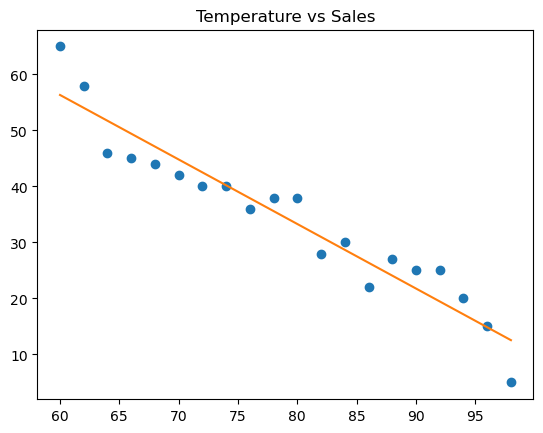

In [19]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

line_fitter=LinearRegression()
line_fitter.fit(temperature,sales)
sales_predict=line_fitter.predict(temperature)

plt.title("Temperature vs Sales")
plt.plot(temperature, sales, 'o')
plt.plot(temperature,sales_predict)
plt.show()

## Execise-learn from other also kaggle and all

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Boston housing dataset
boston = load_boston()

df = pd.DataFrame(boston.data, columns = boston.feature_names)

# Set the x-values to the nitrogen oxide concentration:
X = df[['NOX']]
# Y-values are the prices:
y = boston.target

# Can we do linear regression on this?
line_fitter=LinearRegression()
line_fitter.fit(X,y)
y_predict=line_fitter.predict(X)



plt.scatter(X, y, alpha=0.4)
# Plot line here:
plt.plot(X,y_predict)
plt.title("Boston Housing Dataset")
plt.xlabel("Nitric Oxides Concentration")
plt.ylabel("House Price ($)")
plt.show()
#boston housing dataset removed so change of califonia do and learn